In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")


# LOADING DATA:


In [2]:
startups_data=pd.read_csv("C:\\Users\\JOTHISH N\\Desktop\\DS\\MULTI LINEAR REGRESSION\\50_Startups.csv")

In [3]:
startups_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


There are no null values in the data:

In [4]:
startups_data[startups_data.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


 There are no duplicate values in the data:

In [5]:
a=startups_data.drop(['State'],axis=1)
a

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [6]:
b=a**2
b


,R&D Spend,Administration,Marketing Spend,Profit
0,2.734036e+10,1.874101e+10,2.225802e+11,3.696461e+10
1,2.643801e+10,2.291517e+10,1.970459e+11,3.678419e+10
2,2.354430e+10,1.023042e+10,1.664106e+11,3.650025e+10
3,2.084339e+10,1.408301e+10,1.468419e+11,3.345314e+10
4,2.019450e+10,8.352456e+09,1.340793e+11,2.761843e+10
5,1.739152e+10,9.962976e+09,1.316684e+11,2.464621e+10
6,1.812132e+10,2.166751e+10,1.631159e+10,2.437424e+10
7,1.697760e+10,2.117900e+10,1.048961e+11,2.425887e+10
8,1.453050e+10,2.211733e+10,9.710284e+10,2.316842e+10
9,1.521149e+10,1.181116e+10,9.301379e+10,2.242805e+10


In [7]:
startups_data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

### Creating dummy variables for the Categorical column:

In [8]:
startups_new=pd.get_dummies(startups_data,columns=['State'])

In [9]:
startups_new.columns=['RnD_Spend', 'Administration', 'Marketing_Spend', 'Profit',
       'State_California', 'State_Florida', 'State_NewYork']

<AxesSubplot:>

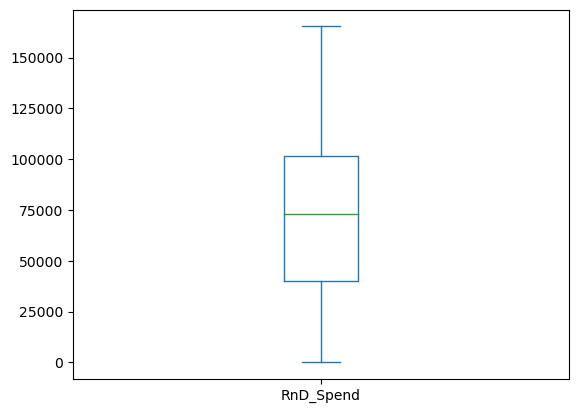

In [10]:
startups_new['RnD_Spend'].plot(kind='box')

<AxesSubplot:>

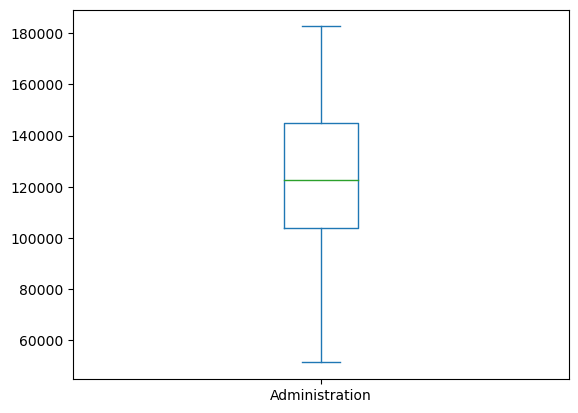

In [11]:
startups_new['Administration'].plot(kind='box')

<AxesSubplot:>

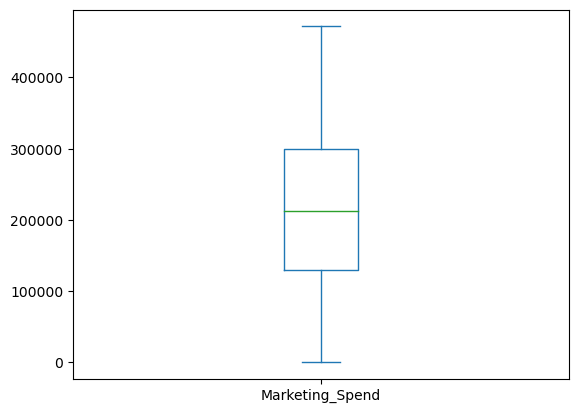

In [12]:
startups_new['Marketing_Spend'].plot(kind='box')

In [13]:
sns.pairplot(startups.iloc[:,:5])

NameError: name 'startups' is not defined

In [14]:
startups_new.corr()

,RnD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_NewYork
RnD_Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_NewYork,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


### Creating new columns which are transformations for the existing columns:

In [15]:
startups_new['admin_sq']=startups_new.Administration**2
startups_new['admin_sqrt']=startups_new.Administration**0.5
startups_new['admin_log']=np.log(startups_new.Administration)
startups_new['mar_sq']=startups_new.Marketing_Spend**2
startups_new['mar_sqrt']=startups_new.Marketing_Spend**0.5
startups_new['mar_log']=np.log(startups_new.Marketing_Spend)
startups_new['rnd_sq']=startups_new.RnD_Spend**2
startups_new['rnd_sqrt']=startups_new.RnD_Spend**0.5
startups_new['rnd_log']=np.log(startups_new.RnD_Spend)

In [16]:
startups_new

,RnD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_NewYork,admin_sq,admin_sqrt,admin_log,mar_sq,mar_sqrt,mar_log,rnd_sq,rnd_sqrt,rnd_log
0,165349.20,136897.80,471784.10,192261.83,0,0,1,1.874101e+10,369.997027,11.826990,2.225802e+11,686.865416,13.064277,2.734036e+10,406.631529,12.015815
1,162597.70,151377.59,443898.53,191792.06,1,0,0,2.291517e+10,389.072731,11.927533,1.970459e+11,666.257105,13.003351,2.643801e+10,403.234051,11.999034
2,153441.51,101145.55,407934.54,191050.39,0,1,0,1.023042e+10,318.033882,11.524316,1.664106e+11,638.697534,12.918862,2.354430e+10,391.716109,11.941075
3,144372.41,118671.85,383199.62,182901.99,0,0,1,1.408301e+10,344.487808,11.684117,1.468419e+11,619.031195,12.856311,2.084339e+10,379.963696,11.880151
4,142107.34,91391.77,366168.42,166187.94,0,1,0,8.352456e+09,302.310718,11.422911,1.340793e+11,605.118517,12.810849,2.019450e+10,376.971272,11.864338
5,131876.90,99814.71,362861.36,156991.12,0,0,1,9.962976e+09,315.934661,11.511071,1.316684e+11,602.379747,12.801776,1.739152e+10,363.148592,11.789624
6,134615.46,147198.87,127716.82,156122.51,1,0,0,2.166751e+10,383.665049,11.899540,1.631159e+10,357.374901,11.757571,1.812132e+10,366.899796,11.810178
7,130298.13,145530.06,323876.68,155752.60,0,1,0,2.117900e+10,381.484023,11.888138,1.048961e+11,569.101643,12.688118,1.697760e+10,360.968323,11.777580
8,120542.52,148718.95,311613.29,152211.77,0,0,1,2.211733e+10,385.640960,11.909814,9.710284e+10,558.223333,12.649518,1.453050e+10,347.192339,11.699758
9,123334.88,108679.17,304981.62,149759.96,1,0,0,1.181116e+10,329.665239,11.596155,9.301379e+10,552.251410,12.628007,1.521149e+10,351.190660,11.722659


### Creating model with the untransformed columns:

In [17]:
model=smf.ols('Profit~RnD_Spend+Administration+Marketing_Spend+State_California+State_Florida+State_NewYork',data=startups_new).fit()

In [18]:
model.fittedvalues

0     192390.571365
1     189071.320106
2     182276.186735
3     173584.976191
4     172277.133819
5     163473.807120
6     158099.292789
7     160155.644651
8     151634.743327
9     154829.662529
10    135664.642592
11    135528.600783
12    129282.917807
13    127431.248986
14    149694.382777
15    146143.635515
16    116854.074528
17    130085.409933
18    129149.725742
19    115594.188411
20    116570.734439
21    117201.505088
22    114833.305137
23    110123.796104
24    113294.373453
25    102200.268919
26    110765.301170
27    114279.804028
28    101818.587387
29    101721.042030
30     99629.010538
31     97617.296321
32     98988.236605
33     98061.358947
34     88974.704161
35     90420.009605
36     75423.092863
37     89577.702221
38     69606.521607
39     83684.976039
40     74762.746174
41     74956.311047
42     70575.993712
43     60100.268218
44     64585.147212
45     47588.364708
46     56272.992679
47     46468.232003
48     49123.073082
49     48185.038790


In [19]:
model.rsquared

0.9507524843355148

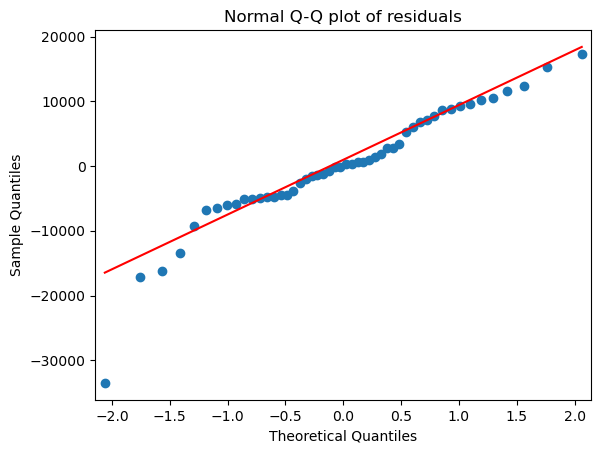

In [20]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

<AxesSubplot:>

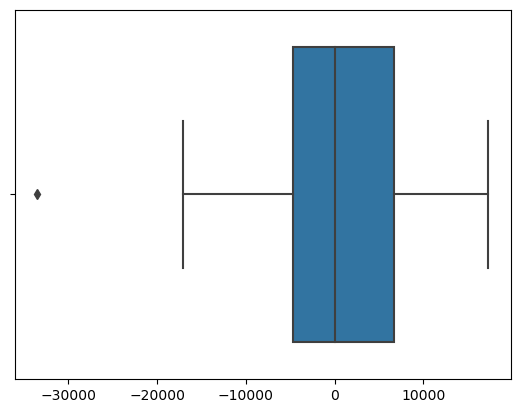

In [21]:
sns.boxplot(model.resid)

<AxesSubplot:ylabel='Density'>

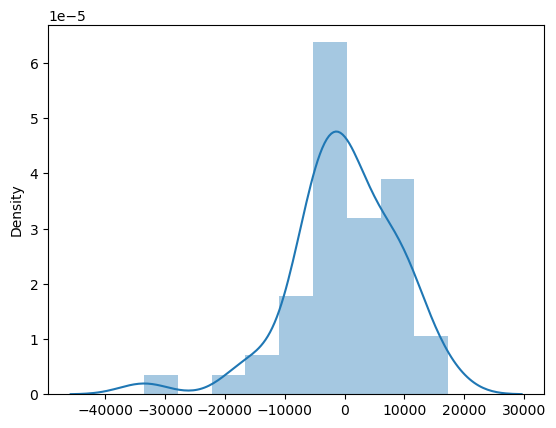

In [22]:
sns.distplot(model.resid)

In [23]:
#The residuals dont have a good distribution:

### Checking for homoscedacity:

In [24]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

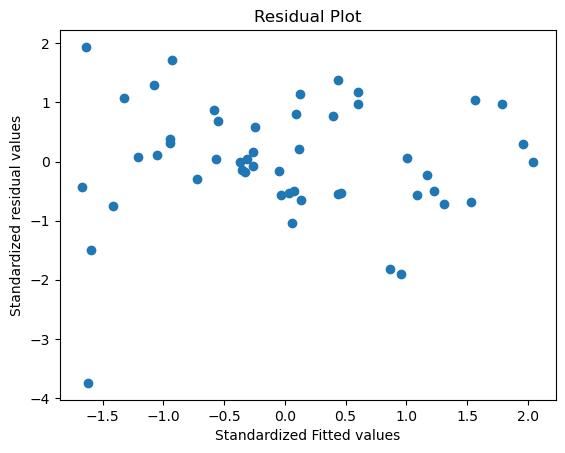

In [25]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [26]:
model.pvalues

Intercept           2.807645e-09
RnD_Spend           2.578772e-21
Administration      6.077373e-01
Marketing_Spend     1.226769e-01
State_California    6.942555e-06
State_Florida       2.992503e-05
State_NewYork       9.409010e-06
dtype: float64

In [27]:
rsq_admin = smf.ols('Administration~RnD_Spend+Marketing_Spend+State_California+State_Florida+State_NewYork',data=startups_new).fit().rsquared  
vif_admin = 1/(1-rsq_admin)

rsq_rnd = smf.ols('RnD_Spend~Administration+Marketing_Spend+State_California+State_Florida+State_NewYork',data=startups_new).fit().rsquared  
vif_rnd = 1/(1-rsq_rnd)

rsq_mar = smf.ols('Marketing_Spend~RnD_Spend+Administration+State_California+State_Florida+State_NewYork',data=startups_new).fit().rsquared  
vif_mar = 1/(1-rsq_mar)


# Storing vif values in a data frame
d1 = {'Variables':['admin','rnd','mar'],'VIF':[vif_admin,vif_rnd,vif_mar]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,admin,1.177766
1,rnd,2.495511
2,mar,2.416797


Administration and Marketing spend has high pvalues particularly administration which has a pvalue of 60%:

Calculating cook's distance and checking for values above the leverage cutoff:

In [31]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
k = 6
n = 50
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff
for i in c:
    if i>leverage_cutoff:
        print(i)
print(c)

[6.58235386e-06 3.39430615e-03 2.39098625e-02 2.02032949e-02
 1.20198420e-02 1.00370545e-02 2.13697865e-03 3.57036535e-03
 6.25257579e-05 5.41213370e-03 1.89764313e-02 1.65867572e-02
 1.82797330e-02 6.34364572e-03 6.17285106e-02 3.72134923e-02
 1.35078103e-02 3.71193311e-03 2.94854637e-03 2.81922632e-02
 6.02783698e-04 1.00287995e-02 3.02178458e-03 3.16115938e-04
 4.34597714e-03 3.56884817e-03 4.96640589e-03 2.78597505e-02
 9.20897921e-04 9.83021753e-05 2.28936702e-05 3.65145588e-06
 5.61582965e-04 2.31043413e-04 1.79909587e-02 7.13289876e-03
 5.07832731e-02 6.16526092e-05 4.78300794e-02 1.37854568e-03
 1.94676476e-03 1.88154422e-03 1.42427115e-04 2.00561912e-02
 1.00026060e-04 8.09098154e-02 3.62771434e-02 3.84131479e-03
 1.34036686e-01 2.26250945e-01]


In [32]:
#All values are below the leverage cutoff:

In [33]:
#Creating models with different transformed columns instead of the Administration Column:

In [34]:
model_admin_sq=smf.ols('Profit~RnD_Spend+admin_sq+Marketing_Spend+State_California+State_Florida+State_NewYork',data=startups_new).fit()
model_admin_sqrt=smf.ols('Profit~RnD_Spend+admin_sqrt+Marketing_Spend+State_California+State_Florida+State_NewYork',data=startups_new).fit()
model_admin_log=smf.ols('Profit~RnD_Spend+admin_log+Marketing_Spend+State_California+State_Florida+State_NewYork',data=startups_new).fit()

In [35]:
print(model_admin_sq.pvalues,model_admin_sqrt.pvalues,model_admin_log.pvalues,sep='\n')

Intercept           2.517322e-14
RnD_Spend           2.460902e-21
admin_sq            5.652020e-01
Marketing_Spend     1.349188e-01
State_California    5.940661e-07
State_Florida       4.665382e-06
State_NewYork       1.212163e-06
dtype: float64
Intercept           7.161532e-05
RnD_Spend           2.528063e-21
admin_sqrt          6.441167e-01
Marketing_Spend     1.147103e-01
State_California    4.975101e-04
State_Florida       9.062034e-04
State_NewYork       4.963419e-04
dtype: float64
Intercept           2.619110e-01
RnD_Spend           2.388318e-21
admin_log           6.921231e-01
Marketing_Spend     1.062041e-01
State_California    2.656939e-01
State_Florida       2.656507e-01
State_NewYork       2.645709e-01
dtype: float64


### Even with transformations applied, the pvalue is very high. Thus eliminating the Administrations column:

In [36]:
model1=smf.ols('Profit~RnD_Spend+Marketing_Spend+State_California+State_Florida+State_NewYork',data=startups_new).fit()

In [37]:
model_mar_sq=smf.ols('Profit~RnD_Spend+mar_sq+State_California+State_Florida+State_NewYork',data=startups_new).fit()
model_mar_sqrt=smf.ols('Profit~RnD_Spend+mar_sqrt+State_California+State_Florida+State_NewYork',data=startups_new).fit()
#model_mar_log=smf.ols('Profit~RnD_Spend+mar_log+State_California+State_Florida+State_NewYork',data=startups_new).fit()

In [38]:
print(model_mar_sq.pvalues,model_mar_sqrt.pvalues,model1.pvalues,sep='\n')

Intercept           3.286941e-23
RnD_Spend           1.725308e-22
mar_sq              1.482270e-01
State_California    1.151792e-07
State_Florida       1.853318e-07
State_NewYork       4.591356e-07
dtype: float64
Intercept           9.373589e-16
RnD_Spend           2.420487e-24
mar_sqrt            8.237836e-02
State_California    1.917196e-06
State_Florida       2.734192e-05
State_NewYork       9.515707e-07
dtype: float64
Intercept           5.420201e-21
RnD_Spend           6.509785e-23
Marketing_Spend     7.204640e-02
State_California    2.004515e-07
State_Florida       1.970877e-06
State_NewYork       4.720949e-07
dtype: float64


In [39]:
# pvalue of marketing spend is higher than 5% in all the transformations and in the untransformed data. Thus marketing spend column is eliminated:

### Calculating cook's distance and checking for values above the leverage cutoff:

In [45]:
model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance
k = 5
n = 50
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff
for i in c:
    if i>leverage_cutoff:
        print(i)
print(c)
print(leverage_cutoff)

[9.36302693e-05 2.04471945e-03 2.59309540e-02 2.45448548e-02
 5.92472096e-03 7.71147801e-03 2.31137569e-03 4.61187082e-03
 2.82464255e-07 4.44612822e-03 2.08324844e-02 1.47599455e-02
 2.15371949e-02 6.27957407e-03 6.49573491e-02 4.24018186e-02
 1.54566352e-02 4.29524836e-03 3.17863986e-03 3.12219200e-02
 6.93418996e-04 9.21045140e-03 3.83896203e-03 2.93929630e-04
 2.48295864e-03 3.26945439e-03 6.31640990e-03 3.22658862e-02
 3.82922600e-07 3.39123158e-04 1.40869788e-04 1.19675217e-04
 5.48795206e-04 1.29348856e-04 6.89992838e-03 7.93657634e-03
 4.97609857e-02 6.41180255e-04 4.31680145e-02 5.51338381e-04
 1.92148634e-03 2.68835363e-03 3.08552920e-04 2.18841144e-02
 1.58350809e-05 9.20442792e-02 4.56219781e-02 5.17009789e-03
 4.33768102e-02 2.68318650e-01]
0.36


In [46]:
# All values are below the leverage cutoff:

### Improving the model:

In [47]:
# Building model with different transformations of the R&D spending column:

In [48]:
model2=smf.ols('Profit~RnD_Spend+State_California+State_Florida+State_NewYork',data=startups_new).fit()

In [49]:
model2.rsquared

0.9467168588373375

In [50]:
model2.pvalues

Intercept           3.145656e-23
RnD_Spend           1.078480e-30
State_California    2.205806e-07
State_Florida       1.714253e-07
State_NewYork       4.913660e-07
dtype: float64

In [51]:
print(model2.mse_resid)

92208584.51691332


In [52]:
model_rnd_sq=smf.ols('Profit~rnd_sq+State_California+State_Florida+State_NewYork',data=startups_new).fit()
model_rnd_sqrt=smf.ols('Profit~rnd_sqrt+State_California+State_Florida+State_NewYork',data=startups_new).fit()
#model_rnd_log=smf.ols('Profit~rnd_log+State_California+State_Florida+State_NewYork',data=startups_new).fit()

In [53]:
print(model_rnd_sq.pvalues,model_rnd_sqrt.pvalues,model2.pvalues,sep='\n')

Intercept           3.892688e-27
rnd_sq              1.031165e-20
State_California    3.520692e-06
State_Florida       4.712795e-08
State_NewYork       3.135185e-06
dtype: float64
Intercept           5.086587e-05
rnd_sqrt            6.151635e-25
State_California    7.367285e-02
State_Florida       1.098025e-01
State_NewYork       3.520079e-02
dtype: float64
Intercept           3.145656e-23
RnD_Spend           1.078480e-30
State_California    2.205806e-07
State_Florida       1.714253e-07
State_NewYork       4.913660e-07
dtype: float64


### Square root transformation has high pvalues:

In [54]:
print(model_rnd_sq.rsquared,model_rnd_sqrt.rsquared,model2.rsquared,sep='\n')

0.8555928118987466
0.9052794732819768
0.9467168588373375


### Untransformed data has the highest rsquared value:

In [55]:
print(model_rnd_sq.mse_resid,model_rnd_sqrt.mse_resid,model2.mse_resid,sep='\n')

249902354.07170278
163917620.14747086
92208584.51691332


In [56]:
#Untransformed data has the lowest error:

### Calculating cook's distance and checking for values above the leverage cutoff:

In [57]:
model_influence = model2.get_influence()
(c, _) = model_influence.cooks_distance
k = 4
n = 50
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff
startups_new['c']=c
startups_new=startups_new[startups_new.c<leverage_cutoff]
startups_new

,RnD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_NewYork,admin_sq,admin_sqrt,admin_log,mar_sq,mar_sqrt,mar_log,rnd_sq,rnd_sqrt,rnd_log,c
0,165349.20,136897.80,471784.10,192261.83,0,0,1,1.874101e+10,369.997027,11.826990,2.225802e+11,686.865416,13.064277,2.734036e+10,406.631529,12.015815,0.002417
1,162597.70,151377.59,443898.53,191792.06,1,0,0,2.291517e+10,389.072731,11.927533,1.970459e+11,666.257105,13.003351,2.643801e+10,403.234051,11.999034,0.008784
2,153441.51,101145.55,407934.54,191050.39,0,1,0,1.023042e+10,318.033882,11.524316,1.664106e+11,638.697534,12.918862,2.354430e+10,391.716109,11.941075,0.033392
3,144372.41,118671.85,383199.62,182901.99,0,0,1,1.408301e+10,344.487808,11.684117,1.468419e+11,619.031195,12.856311,2.084339e+10,379.963696,11.880151,0.034276
4,142107.34,91391.77,366168.42,166187.94,0,1,0,8.352456e+09,302.310718,11.422911,1.340793e+11,605.118517,12.810849,2.019450e+10,376.971272,11.864338,0.006540
5,131876.90,99814.71,362861.36,156991.12,0,0,1,9.962976e+09,315.934661,11.511071,1.316684e+11,602.379747,12.801776,1.739152e+10,363.148592,11.789624,0.004258
6,134615.46,147198.87,127716.82,156122.51,1,0,0,2.166751e+10,383.665049,11.899540,1.631159e+10,357.374901,11.757571,1.812132e+10,366.899796,11.810178,0.016246
7,130298.13,145530.06,323876.68,155752.60,0,1,0,2.117900e+10,381.484023,11.888138,1.048961e+11,569.101643,12.688118,1.697760e+10,360.968323,11.777580,0.006368
8,120542.52,148718.95,311613.29,152211.77,0,0,1,2.211733e+10,385.640960,11.909814,9.710284e+10,558.223333,12.649518,1.453050e+10,347.192339,11.699758,0.000078
9,123334.88,108679.17,304981.62,149759.96,1,0,0,1.181116e+10,329.665239,11.596155,9.301379e+10,552.251410,12.628007,1.521149e+10,351.190660,11.722659,0.004318


### Removed data that was above the leverage cutoff:

In [58]:
model3=smf.ols('Profit~RnD_Spend+State_California+State_Florida+State_NewYork',data=startups_new).fit()

In [59]:
print(model3.rsquared,model2.rsquared)

0.957797215080174 0.9467168588373375


In [60]:
print(np.sqrt(model3.mse_resid),np.sqrt(model2.mse_resid))

8098.810995630994 9602.53011017999


In [61]:
print(model3.pvalues,model2.pvalues,sep='\n')

Intercept           2.820149e-26
RnD_Spend           1.775643e-32
State_California    2.558546e-10
State_Florida       3.357377e-09
State_NewYork       1.426591e-08
dtype: float64
Intercept           3.145656e-23
RnD_Spend           1.078480e-30
State_California    2.205806e-07
State_Florida       1.714253e-07
State_NewYork       4.913660e-07
dtype: float64


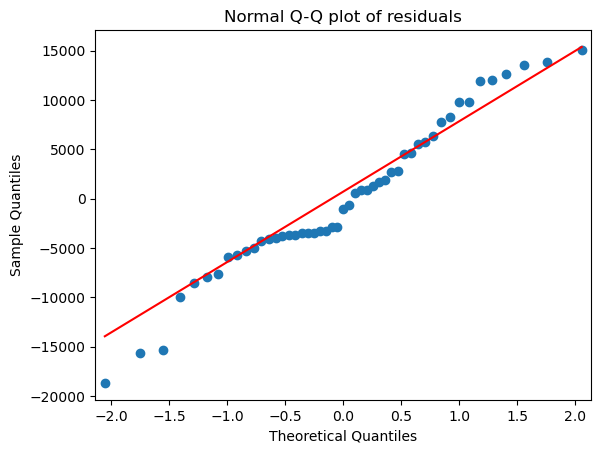

In [62]:
qqplot=sm.qqplot(model3.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

<AxesSubplot:>

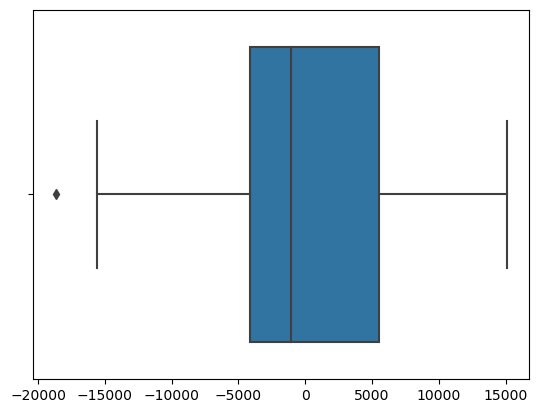

In [63]:
sns.boxplot(model3.resid)

<AxesSubplot:ylabel='Density'>

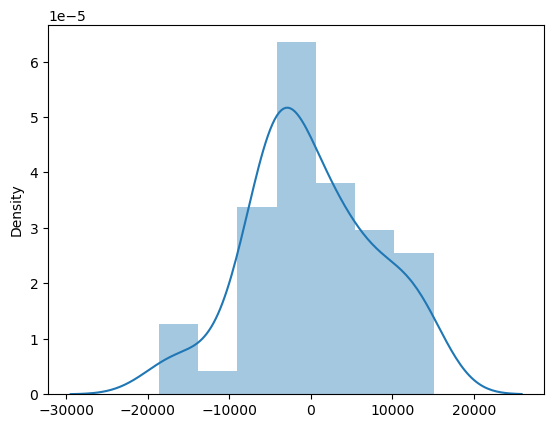

In [64]:
sns.distplot(model3.resid)

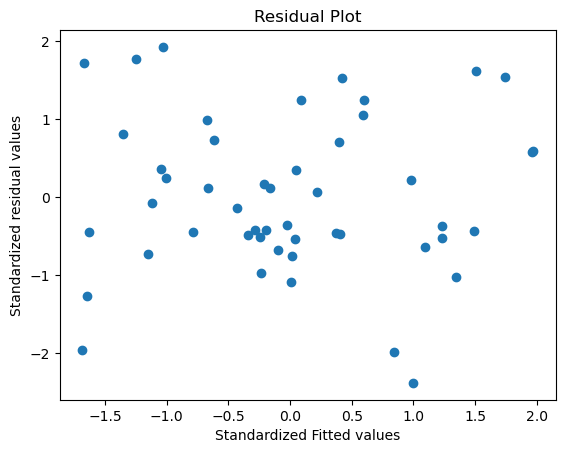

In [65]:
plt.scatter(get_standardized_values(model3.fittedvalues),
            get_standardized_values(model3.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

### Model3 has the least mse error with a good rsquare values and acceptable pvalues. So model3 is is taken as the finalised model:

In [66]:
model_final=model3

In [67]:
created_models=pd.Series(['model','model_admin_sq','model_admin_sqrt','model_admin_log','model1','model_mar_sq','model_mar_sqrt','model2','model_rnd_sq','model_rnd_sqrt','model3(final model)'])
rsquared=pd.Series([model.rsquared,model_admin_sq.rsquared,model_admin_sqrt.rsquared,model_admin_log.rsquared,model1.rsquared,model_mar_sq.rsquared,model_mar_sqrt.rsquared,model2.rsquared,model_rnd_sq.rsquared,model_rnd_sq.rsquared,model_final.rsquared])
rsquared_df=pd.DataFrame()
rsquared_df['models']=created_models
rsquared_df['rsquared']=rsquared

## Table of rsquared values of all models:

In [68]:
rsquared_df

,models,rsquared
0,model,0.950752
1,model_admin_sq,0.950829
2,model_admin_sqrt,0.950696
3,model_admin_log,0.950632
4,model1,0.950453
5,model_mar_sq,0.949162
6,model_mar_sqrt,0.950210
7,model2,0.946717
8,model_rnd_sq,0.855593
9,model_rnd_sqrt,0.855593


### Predicting for new values:

In [69]:
new=pd.DataFrame(columns=['RnD_Spend', 'Administration', 'Marketing_Spend','State_California', 'State_Florida', 'State_NewYork'])
new.loc[0]=[150000,100000,300000,0,1,0]
new.loc[1]=[180000,50000,500000,0,0,1]
new

,RnD_Spend,Administration,Marketing_Spend,State_California,State_Florida,State_NewYork
0,150000,100000,300000,0,1,0
1,180000,50000,500000,0,0,1


In [70]:
model_final.predict(new)

0    176188.203757
1    199787.347632
dtype: float64